Task 35-> Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) are a type of deep learning model particularly well-suited for image and video recognition tasks. They work by using convolutional layers to automatically and
adaptively learn spatial hierarchies of features from input images. Basic tasks that can be done from scratch with CNNs include image classification, where the model learns to categorize images into
predefined classes, and object detection, where the model identifies and locates objects within an image. Other fundamental tasks include image segmentation, which involves partitioning an image into
regions of interest, and image denoising, where the model learns to remove noise from images to
enhance their quality.

Load and preprocess the image

In [ ]:
from google.colab import files
uploaded = files.upload()
image_path = 'cnn.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.rgb_to_grayscale(image)
image = tf.image.resize(image, (28, 28)) / 255.0

Saving cnn.jpg to cnn (1).jpg


Adjust brightness and contrast

In [ ]:
image = tf.image.adjust_brightness(image, delta=0.1)
image = tf.image.adjust_contrast(image, contrast_factor=1.5)

Define sharpening and smoothing kernels

In [ ]:
sharpen_kernel = tf.constant([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]], dtype=tf.float32)

smooth_kernel = tf.constant([[1/16, 2/16, 1/16],
                             [2/16, 4/16, 2/16],
                             [1/16, 2/16, 1/16]], dtype=tf.float32)

Apply the filters

In [ ]:
def apply_filter(image, kernel):
    image = tf.expand_dims(image, axis=0)#add batch dimension to the image tensor
    image = tf.expand_dims(image, axis=-1)#add channel dimension to the image tensor
    filtered_image = tf.nn.conv2d(image, kernel[..., tf.newaxis, tf.newaxis], strides=[1, 1, 1, 1], padding='SAME')
    #Applies a 2D filter to the image with the kernel, keeping the same output size
    return tf.squeeze(filtered_image)

sharpened_image = apply_filter(image, sharpen_kernel)
smoothed_image = apply_filter(image, smooth_kernel)

Display original, sharpened, and smoothed images

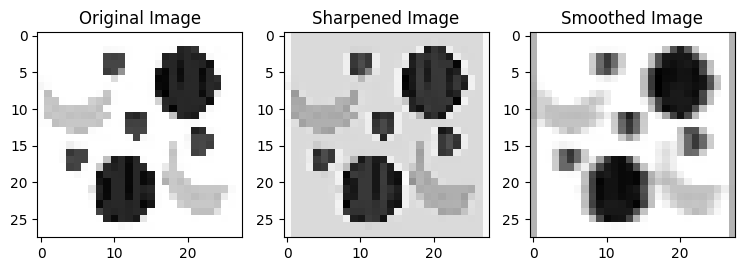

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(tf.squeeze(image), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Smoothed Image")
plt.imshow(smoothed_image, cmap='gray')
plt.show()